In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
wine= pd.read_csv(r'C:\Users\mbawala\Downloads\wine-quality.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
#grouping a good wine if it has a quality > 7
wine['good_quality']= [1 if x >= 7
                 else 0 for x in wine['quality']]

In [6]:
#create a test set and training set
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(wine, test_size= 0.3, random_state= 30)

In [7]:
corr= train_set.corr()
corr['quality'].sort_values(ascending= False)

quality                 1.000000
good_quality            0.716003
alcohol                 0.471952
citric acid             0.254442
sulphates               0.249916
fixed acidity           0.127917
residual sugar          0.008377
free sulfur dioxide    -0.050726
pH                     -0.069324
chlorides              -0.111095
density                -0.169888
total sulfur dioxide   -0.191415
volatile acidity       -0.392611
Name: quality, dtype: float64

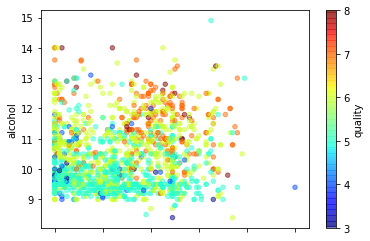

In [8]:
wine.plot(kind= 'scatter', x= 'citric acid', y= 'alcohol',
         cmap= plt.get_cmap('jet'), c= 'quality', alpha= 0.5, colorbar= True)

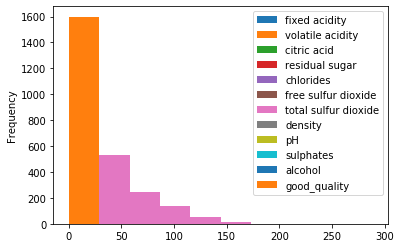

In [9]:
wine.plot(kind= 'hist', x= 'quality')

In [10]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(train_set)

array([[-0.78913808,  0.29985146, -0.79430047, ...,  0.09706611,
        -0.81068545, -0.39797625],
       [-1.13950662,  1.90649004, -1.26607448, ...,  2.20025536,
         0.43712338, -0.39797625],
       [ 0.49554657,  0.01798504, -0.16526846, ..., -0.858929  ,
        -0.81068545, -0.39797625],
       ...,
       [-0.32198003, -0.03838824, -0.11284913, ..., -1.33692656,
         0.43712338, -0.39797625],
       [ 0.90430986, -1.44772033,  1.14521489, ...,  2.00905634,
         1.6849322 ,  2.51271278],
       [-1.0227171 ,  1.76555683, -1.26607448, ...,  1.81785732,
         1.6849322 ,  2.51271278]])

In [12]:
#creating a x and target variables
train_targets= train_set['good_quality'].copy()
train_data= train_set.drop(['quality', 'good_quality'], axis= 1)

In [14]:
train_targets.value_counts()

0    966
1    153
Name: good_quality, dtype: int64

In [18]:
#creating a first model decision tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(train_data, train_targets)
tree_predictions= tree.predict(train_data)
report= classification_report(train_targets, tree_predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [20]:
#try training using the cross_val_score
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree, train_data, train_targets,
                       scoring= 'accuracy', cv= 5)
print(scores)

[0.87946429 0.88392857 0.82589286 0.84821429 0.85201794]


In [22]:
#try using the randomforestclf
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()
forest.fit(train_data, train_targets)
forest_predictions= forest.predict(train_data)
forest_report= classification_report(train_targets, forest_predictions)
print(forest_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



In [23]:
forest_scores= cross_val_score(forest, train_data, train_targets, 
                              scoring= 'accuracy', cv= 7)
print(forest_scores)

[0.925      0.86875    0.88125    0.9        0.9125     0.875
 0.89308176]


In [27]:
#fine tuning the above models with randomsearchcv
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dict= {
    'n_estimators': randint(low= 1, high= 300),
    'max_features': randint(low= 1, high= 10),
}

rnd_search= RandomizedSearchCV(forest, param_distributions= param_dict, cv= 5,
                              n_iter= 20, scoring= 'accuracy')
rnd_search.fit(train_data, train_targets)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [30]:
cvres= rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.8909793401665599 {'max_features': 7, 'n_estimators': 24}
0.8954356181934656 {'max_features': 7, 'n_estimators': 140}
0.8981302049967969 {'max_features': 4, 'n_estimators': 45}
0.9008127802690582 {'max_features': 9, 'n_estimators': 168}
0.8990190582959642 {'max_features': 4, 'n_estimators': 131}
0.898126201153107 {'max_features': 4, 'n_estimators': 246}
0.8945547725816784 {'max_features': 5, 'n_estimators': 194}
0.8954436258808455 {'max_features': 8, 'n_estimators': 292}
0.8963444907110827 {'max_features': 4, 'n_estimators': 157}
0.8954516335682253 {'max_features': 4, 'n_estimators': 169}
0.8936499039077515 {'max_features': 1, 'n_estimators': 22}
0.8945507687379883 {'max_features': 4, 'n_estimators': 215}
0.8981342088404869 {'max_features': 4, 'n_estimators': 56}
0.898126201153107 {'max_features': 1, 'n_estimators': 148}
0.8954436258808457 {'max_features': 3, 'n_estimators': 265}
0.8972293401665599 {'max_features': 6, 'n_estimators': 183}
0.8936539077514414 {'max_features': 1, 'n_esti

In [35]:
new_model= rnd_search.best_estimator_
print(new_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=182,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [36]:
scores= cross_val_score(new_model, train_data, train_targets, cv= 5,
               scoring= 'accuracy')
print(scores)

[0.90625    0.87053571 0.89285714 0.89732143 0.89237668]


In [37]:
#working on the test_set
scaler.fit_transform(test_set)

array([[ 0.97350455, -0.65781654,  0.88522473, ...,  1.19236628,
         1.70213118,  2.54950976],
       [-0.63570853,  1.69588604, -1.22581379, ...,  0.46964401,
        -1.95618061, -0.39223227],
       [-0.74668874,  0.1632425 , -1.17671988, ...,  0.10828287,
        -0.73674335, -0.39223227],
       ...,
       [ 0.36311338, -0.27465565,  1.27797608, ...,  1.46338713,
         1.70213118,  2.54950976],
       [-0.19178768,  0.874827  , -0.29302933, ..., -0.52409912,
        -0.73674335, -0.39223227],
       [-0.46923821,  0.38219158, -0.04755973, ..., -0.61443941,
         0.48269392, -0.39223227]])

In [38]:
test_targets= test_set['good_quality'].copy()
test_data= test_set.drop(['quality', 'good_quality'], axis= 1)

In [39]:
#evaluating the model in the test_set
final_scores= cross_val_score(new_model, test_data, test_targets,
                              cv= 5, scoring= 'accuracy')
print(final_scores)

[0.875      0.78125    0.875      0.85416667 0.86458333]
